1 310954593
2 1273684022
3 1757646152
4 4351598077
5 9190624999
6 860682764
7 859740199
8 1273963973
9 1273684022
10 4227527913
11 1784334587
12 1844848286
13 3758383709
14 5437769528
15 4344516910
16 310954846
17 1273684022
18 4227527913
19 1839133864
20 317339281


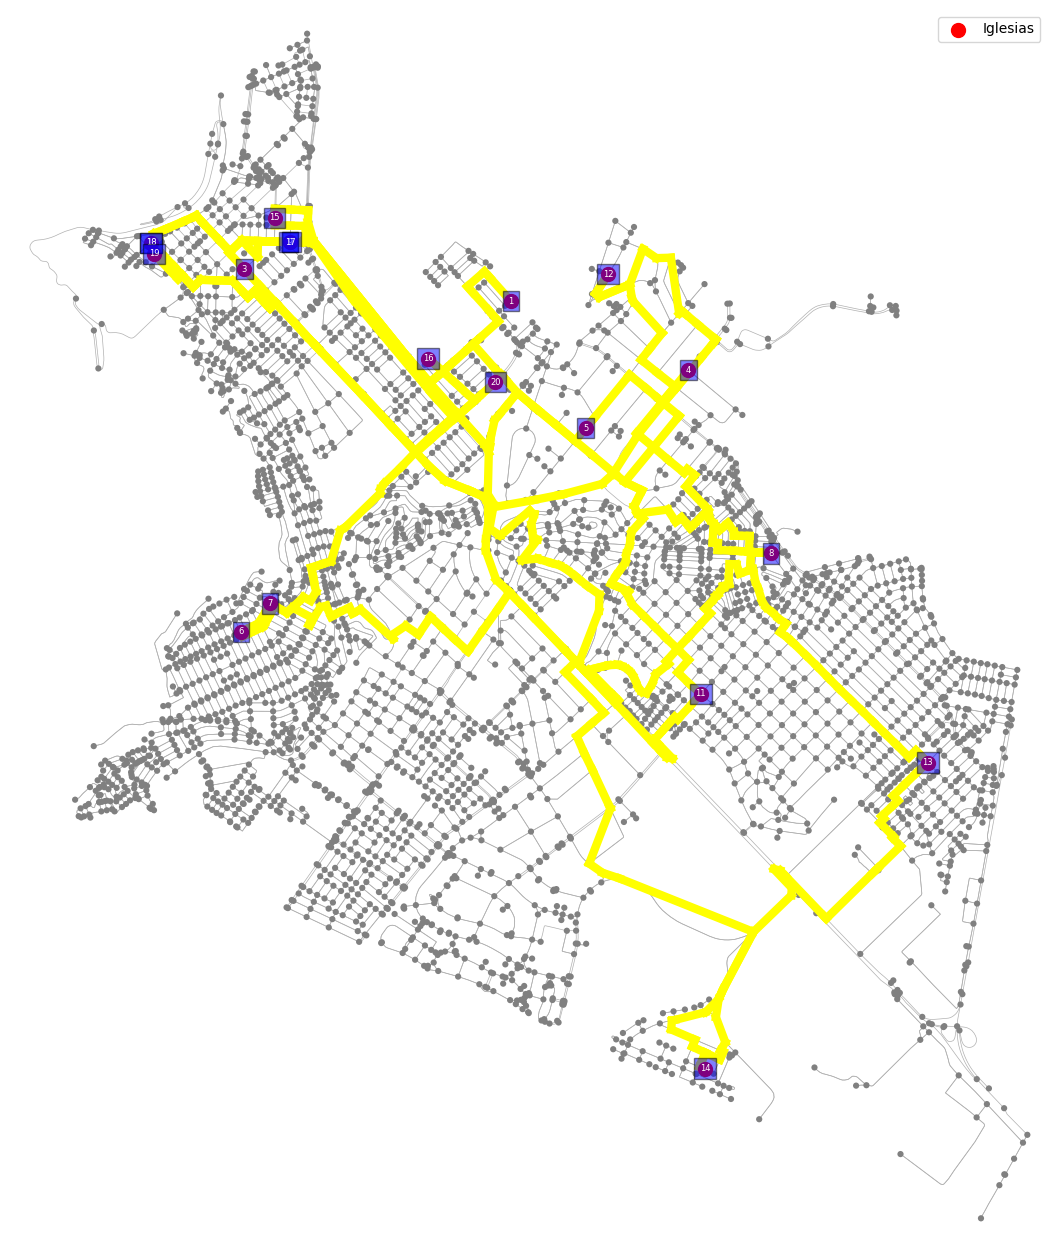

La distancia total de la ruta propuesta es de 65650.64959452565 metros.


In [59]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import sklearn
import math

# Obtener el grafo
place_name = "Chorrillos, Lima, Peru"
G = ox.graph_from_place(place_name, network_type='drive')

# Obtener iglesias
tags  = {'amenity': 'place_of_worship', 'religion': 'christian'}  # Tags para buscar iglesias
churches= ox.features_from_place(place_name, tags)
churches = churches[churches.geometry.type == 'Point']

# Convertir los nodos a un DataFrame
#nodes, edges = ox.graph_to_gdfs(G)

# Visualizar el gráfico de red
#fig, ax = ox.plot_graph(G)
#plt.show()

church_nodes = []
for idx, church in churches.iterrows():
    point = church.geometry
    nearest_node = ox.nearest_nodes(G, point.x, point.y)  # Usamos nearest_nodes
    church_nodes.append(nearest_node)

def heuristic(u, v):
    u_x, u_y = G.nodes[u]['x'], G.nodes[u]['y']
    v_x, v_y = G.nodes[v]['x'], G.nodes[v]['y']
    return math.sqrt((v_x - u_x) ** 2 + (v_y - u_y) ** 2)

# Implementar la búsqueda avara para recorrer las iglesias
route = []
current_node = church_nodes[0]
for next_node in church_nodes[1:]:
    path = nx.astar_path(G, current_node, next_node, heuristic=heuristic, weight=lambda u, v, d: 0)  # g-cost = 0
    route.extend(path[:-1])  # Evitar duplicar nodos
    current_node = next_node

# Agregar el último segmento para cerrar el ciclo
route.append(current_node)

# Visualizar la ruta junto con las iglesias
fig, ax = plt.subplots(figsize=(24, 16))
#fig, ax = ox.plot_graph(G, show=False, close=False, node_color='gray', node_size=20, edge_linewidth=0.5, edge_color='#B0B0B0')
ox.plot_graph(G, ax=ax, show=False, close=False, node_color='gray', node_size=20, edge_linewidth=0.5, edge_color='#B0B0B0')

# Dibujar las iglesias
church_x = [G.nodes[node]['x'] for node in church_nodes if node in G.nodes]
church_y = [G.nodes[node]['y'] for node in church_nodes if node in G.nodes]
ax.scatter(church_x, church_y, c='red', s=100, label='Iglesias', zorder=5)

# Dibujar la ruta manualmente
for i in range(len(route) - 1):
    start_node = route[i]
    end_node = route[i + 1]
    start_pos = (G.nodes[start_node]['x'], G.nodes[start_node]['y'])
    end_pos = (G.nodes[end_node]['x'], G.nodes[end_node]['y'])
    ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], color='yellow', linewidth=6)

# Anotar cada nodo en la ruta con su orden
pos = 1
for i, node in enumerate(route):
    node_point = G.nodes[node]
    if node in church_nodes:
        print(pos, node)
        ax.text(node_point['x'], node_point['y'], str(pos), fontsize=6, color='white', ha='center', va='center', bbox=dict(facecolor='blue', alpha=0.5), zorder=6)
        pos = pos + 1

# Asegurar que la leyenda se muestre
ax.legend()

# Mostrar el mapa
plt.show()

def calculate_route_length(route, graph):
    length = 0.0
    for i in range(len(route) - 1):
        edge_data = graph.get_edge_data(route[i], route[i+1])
        length += edge_data[0]['length']  # Asume que la longitud está en edge_data[0]['length']
    return length

# Suponiendo que 'route' es la lista de nodos de tu ruta ya calculada
total_length = calculate_route_length(route, G)
print(f"La distancia total de la ruta propuesta es de {total_length} metros.")
